In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from mpl_toolkits.basemap import Basemap
import folium
import branca.colormap as cm

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**1.** Загрузите агрегированные данные о поездках в мае 2016. Просуммируйте общее количество поездок такси из каждой географической зоны и посчитайте количество ячеек, из которых в мае не было совершено ни одной поездки.

In [3]:
data = pd.read_csv("Taxi-may2016-agregated.csv")

In [4]:
data.head(5)

,1,2,3,4,5,6,7,8,9,10,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Просуммируйте общее количество поездок такси из каждой географической зоны
df_reg_sum = data.sum(axis=0)

In [6]:
# посчитайте количество ячеек, из которых в мае не было совершено ни одной поездки.
print((df_reg_sum == 0).sum())

1283


In [7]:
# Отметим максимальное еоличество поездок 
max_count = df_reg_sum.max()
print(int(max_count))

638799


In [23]:
df_reg_sum

1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
       ... 
2496    0.0
2497    0.0
2498    0.0
2499    0.0
2500    0.0
Length: 2500, dtype: float64

In [20]:
df_reg_sum.shape

(2500,)

**2.** Нарисуйте статическую карту Нью-Йорка. Поставьте на карте точку там, где находится Эмпайр-Стейт-Билдинг.

In [8]:
# Построим сетку для регионов
regions = pd.read_csv('regions.csv', sep=';')
longs, lats = np.meshgrid(np.unique(regions[['west', 'east']].values), 
                          np.unique(regions[['south', 'north']].values))

In [9]:
# Нью-Йорк вписан в прямоугольник
West = -74.25559
East = -73.70001
South = 40.49612
North = 40.91553

In [10]:
#Longitude of Empire State Building -73.985664
#Latitude of Empire State Building: 40.748441
ESB_long = -73.985664
ESB_lat  =  40.748441

In [11]:
NY_map = Basemap(llcrnrlat = South, llcrnrlon = West, 
                 urcrnrlat = North, urcrnrlon = East,
                projection='lcc', resolution='i',
                lat_0 = (North+South)/2.0, lon_0 = (West+East)/2.0, 
                epsg=4326)

Text(-73.985664, 40.753441, 'Empire State Building')

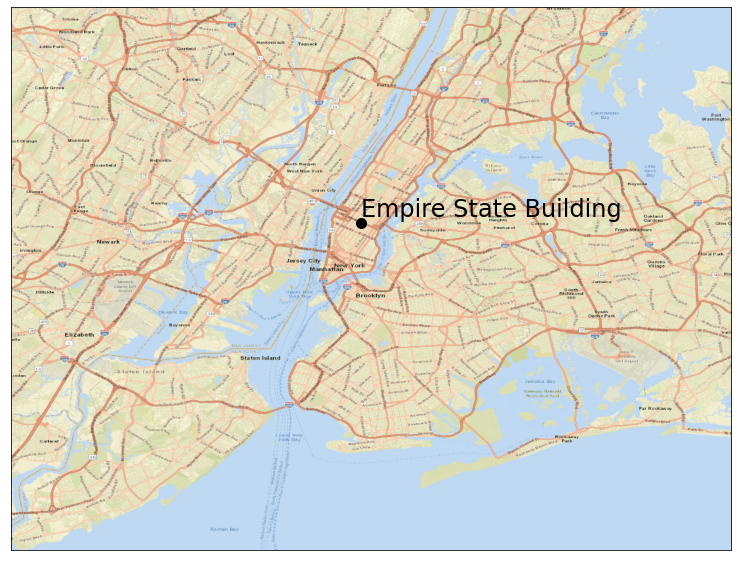

In [13]:
plt.figure(figsize=(16,10))

NY_map.arcgisimage(service="World_Street_Map", xpixels=1200, epsg=4362)

x, y = NY_map(ESB_long, ESB_lat)
plt.plot(x, y, 'ok', markersize=10)
plt.text(x, y+0.005, 'Empire State Building', fontsize=24)

**3.** Поверх статической карты Нью-Йорка визуализируйте данные о поездках из каждой ячейки так, чтобы цветовая шкала, в которую вы окрашиваете каждую ячейку, показывала суммарное количество поездок такси из неё.



In [14]:
NY_map = Basemap(llcrnrlat = South, llcrnrlon = West, 
                 urcrnrlat = North, urcrnrlon = East,
                projection='lcc', resolution='i',
                lat_0 = (North+South)/2.0, lon_0 = (West+East)/2.0, 
                epsg=4326)

In [18]:
df_reg_sum

1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
       ... 
2496    0.0
2497    0.0
2498    0.0
2499    0.0
2500    0.0
Length: 2500, dtype: float64

Text(-73.985664, 40.748441, 'Empire State Building')

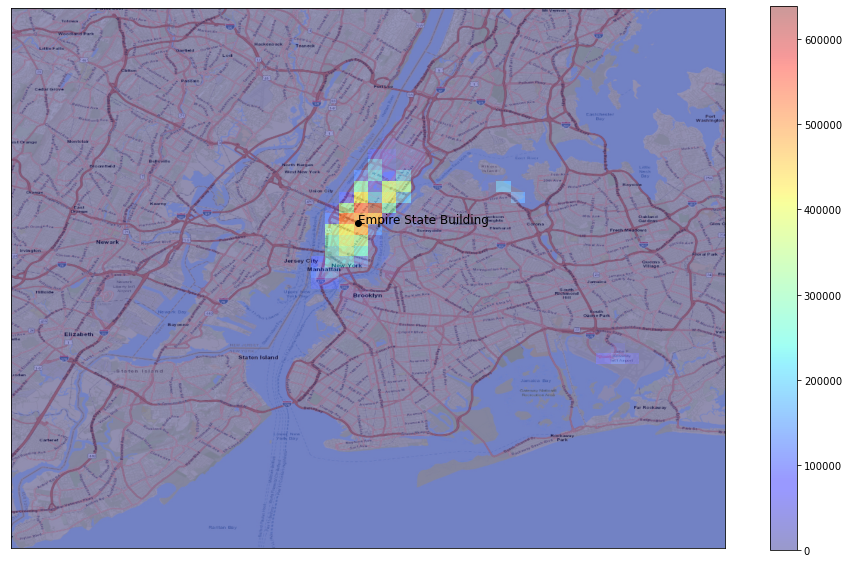

In [19]:
plt.figure(figsize=(16,10))

NY_map.pcolormesh(longs, lats, np.array(df_reg_sum).reshape(50,50).transpose(), cmap='jet', alpha=0.4)
plt.colorbar()

NY_map.arcgisimage(service="World_Street_Map", xpixels=1200, epsg=4362)

x, y = NY_map(ESB_long, ESB_lat)
plt.plot(x, y, 'ok', markersize=6)
plt.text(x, y, 'Empire State Building', fontsize=12)

**4.** Вставьте интерактивную карту Нью-Йорка — такую, которую можно прокручивать и увеличивать. Поставьте метку там, где находится статуя свободы.

In [ ]:
# Statue Of Liberty
SOL_lat = 40.68917
SOL_long = -74.04444

In [ ]:
f_map = folium.Map([ESB_lat, ESB_long],tiles='OpenStreetMap', zoom_start=10)
folium.Marker(location=[SOL_lat, SOL_long], 
              popup="Statue of Liberty",
             icon=folium.Icon(color='lightgreen')).add_to(f_map)

In [ ]:
f_map

**5.** Нарисуйте на интерактивной карте Нью-Йорка ячейки так, чтобы их цвет показывал среднее за месяц количество поездок такси в час из этой зоны.


In [ ]:
df_reg_mean = data.mean(axis=0)
max_mean = int(df_reg_mean.max())

In [ ]:
colormap = cm.LinearColormap(colors=['blue', 'green', 'yellow', 'orange', 'red'],
                            index=np.round(np.linspace(0, max_mean, 5)),
                            vmin=0, vmax=max_mean)

In [ ]:
f_map = folium.Map([ESB_lat, ESB_long],tiles='OpenStreetMap', zoom_start=10)
folium.Marker(location=[SOL_lat, SOL_long], 
              popup="Statue of Liberty",
             icon=folium.Icon(color='lightgreen')).add_to(f_map)

for i in range(2500):
    folium.Rectangle(
        bounds=list([
            (regions['south'].iloc[i], regions['west'].iloc[i]),
            (regions['north'].iloc[i], regions['east'].iloc[i])
        ]), 
        color=0, fill=True, fill_opacity=0.5,
        fill_color=colormap(int(df_reg_mean[i]))
    ).add_to(f_map)
    
f_map

**6.** Чтобы не выбирать из всех 2500 ячеек вручную, отфильтруйте ячейки, из которых в мае совершается в среднем меньше 5 поездок в час. Посчитайте количество оставшихся. Проверьте на карте, что среди этих ячеек нет таких, из которых поездки на самом деле невозможны.


In [ ]:
df_reg_mean[df_reg_mean < 5]=0
print("Количество ненулевых ячеек: %d" % df_reg_mean[df_reg_mean!=0].shape[0])

In [ ]:
f_map = folium.Map([ESB_lat, ESB_long],tiles='OpenStreetMap', zoom_start=10)
folium.Marker(location=[SOL_lat, SOL_long], 
              popup="Statue of Liberty",
             icon=folium.Icon(color='lightgreen')).add_to(f_map)

for i in range(2500):
    folium.Rectangle(
        bounds=list([
            (regions['south'].iloc[i], regions['west'].iloc[i]),
            (regions['north'].iloc[i], regions['east'].iloc[i])
        ]), 
        color=0, fill=True, fill_opacity=0.5,
        fill_color=colormap(int(df_reg_mean[i]))
    ).add_to(f_map)
    
f_map

По карте нельзя сказать, что присутствуют ячейки, откуда поездки были бы невозможны.

**7.** Сохраните ноутбук в формате html, запакуйте ipynb и html в один архив и загрузите его в форму (html облегчит задачу проверки вашим рецензентам — в ipynb динамические карты часто не сохраняются, а для выполнения кода рецензентам придётся устанавливать все библиотеки).

In [ ]:
df_reg_mean[df_reg_mean!=0].to_csv("df_reg_mean.csv")

In [ ]:
pd.DataFrame(df_reg_mean[df_reg_mean!=0].index).to_csv("df_reg_mean.csv")